# Genero los graficos relacionados con los avisos

#### Cargo librerias a utilizar:

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib as plt
import numpy as np
import calendar

#### Cargo los archivos a utilizar:

In [3]:
avisos = pd.read_csv('Sources/fiuba_6_avisos_detalle.csv')

In [4]:
avisos.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


#### Cantidad de avisos por zona:

,idaviso,idpais,titulo,descripcion,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
nombre_zona,,,,,,,,,,
Buenos Aires (fuera de GBA),2,2,2,2,0,0,2,2,2,2
Capital Federal,876,876,876,876,4,871,876,876,876,876
GBA Oeste,2,2,2,2,0,1,2,2,2,2
Gran Buenos Aires,12654,12654,12654,12654,43,0,12654,12654,12654,12649


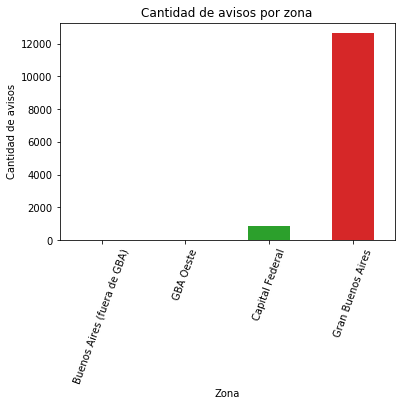

In [5]:
plt = avisos.groupby('nombre_zona').count().sort_values('idaviso').loc[:, 'idaviso'].plot.bar()
plt.set_title('Cantidad de avisos por zona')
plt.set_xlabel('Zona')
plt.set_ylabel('Cantidad de avisos')
plt.tick_params(axis='x', labelrotation=70)
avisos.groupby('nombre_zona').count()

#### Cantidad de avisos por area de trabajo

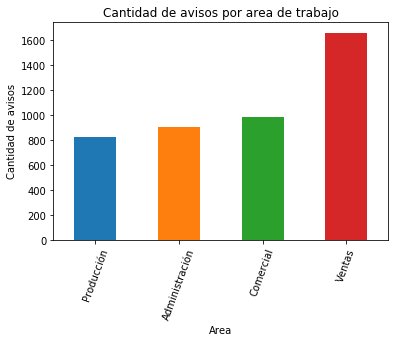

In [6]:
plt = avisos.groupby('nombre_area').count().sort_values('idaviso')[-4:].loc[:, 'idaviso'].plot.bar()
plt.set_title('Cantidad de avisos por area de trabajo')
plt.set_xlabel('Area')
plt.set_ylabel('Cantidad de avisos')
plt.tick_params(axis='x', labelrotation=70)

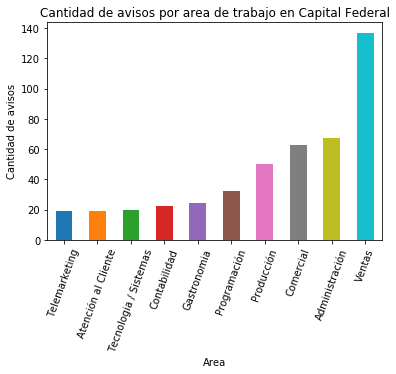

In [26]:
plt = avisos.groupby('nombre_zona').get_group('Capital Federal').groupby('nombre_area').count().sort_values('idaviso')[-10:].loc[:, 'idaviso'].plot.bar()
plt.set_title('Cantidad de avisos por area de trabajo en Capital Federal')
plt.set_xlabel('Area')
plt.set_ylabel('Cantidad de avisos')
plt.tick_params(axis='x', labelrotation=70)

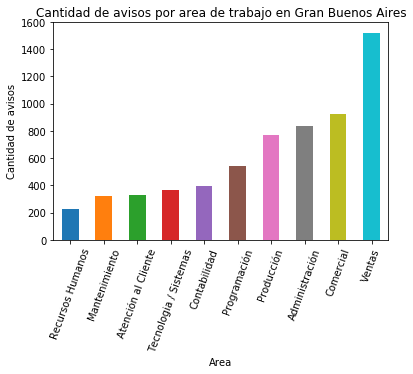

In [30]:
plt = avisos.groupby('nombre_zona').get_group('Gran Buenos Aires').groupby('nombre_area').count().sort_values('idaviso')[-10:].loc[:, 'idaviso'].plot.bar()
plt.set_title('Cantidad de avisos por area de trabajo en Gran Buenos Aires')
plt.set_xlabel('Area')
plt.set_ylabel('Cantidad de avisos')
plt.tick_params(axis='x', labelrotation=70)

#### Cantidad de avisos por tipo de trabajo

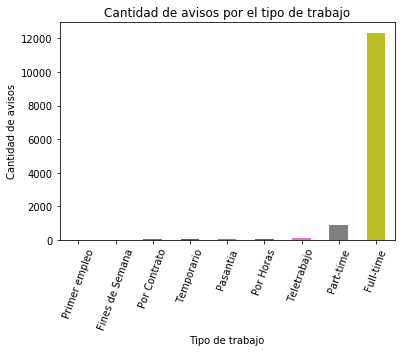

In [38]:
plt = avisos.groupby('tipo_de_trabajo').count().sort_values('idaviso').loc[:,'idaviso'].plot.bar()
plt.set_title('Cantidad de avisos por el tipo de trabajo')
plt.set_xlabel('Tipo de trabajo')
plt.set_ylabel('Cantidad de avisos')
plt.tick_params(axis='x', labelrotation=70)

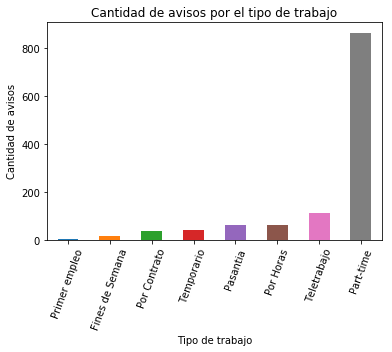

In [37]:
plt = avisos.groupby('tipo_de_trabajo').count().sort_values('idaviso')[:-1].loc[:,'idaviso'].plot.bar()
plt.set_title('Cantidad de avisos por el tipo de trabajo')
plt.set_xlabel('Tipo de trabajo')
plt.set_ylabel('Cantidad de avisos')
plt.tick_params(axis='x', labelrotation=70)